# ENGS 108 Applied Machine Learning 
## Final Project

### Predicting likelyhood of a song being successful

Idea from the Kaggle data set found here: https://www.kaggle.com/geomack/spotifyclassification


In [1]:
import pandas as pd 
import numpy as np
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
cid ="af834c73413b4e3abe51409e54a12b56" #CLIENT ID
secret = "c572f66c7257454ea5189dee36084cdd" # CLIENT SECRET

In [3]:
def get_playlist(user_ID, playlist_URI, cid, secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    playlist = sp.user_playlist(user_ID, playlist_URI) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    titles = []
    artists = []
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"])
        artists.append(songs[i]['track']['artists'][0]['name'])
        titles.append(songs[i]['track']['album']['name'])
    features = sp.audio_features(ids) 
    return pd.DataFrame(features), artists, titles

In [4]:
user_ID = "gravsibs"
playlist_URI = "7zhfzvSSo9Q0JWzkbw2w5j"
df, df['artist'], df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
df = df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
df['target'] = np.ones(len(df))

In [5]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,song_title,target
0,0.109000,0.652,239098,0.549,0.000008,6,0.0834,-9.604,0,0.0774,106.453,4,0.4270,Tove Styrke,Ego (Bearson Remix),1.0
1,0.201000,0.621,262922,0.758,0.215000,8,0.1230,-5.859,0,0.0321,105.056,4,0.1170,Janji,Aurora (feat. T.R.),1.0
2,0.165000,0.758,196311,0.510,0.075500,1,0.2720,-10.645,1,0.0393,102.992,4,0.2860,Gabriel Rios,Gold (Thomas Jack Radio Edit),1.0
3,0.236000,0.746,299440,0.809,0.000026,2,0.2350,-6.429,1,0.0329,104.989,4,0.5200,Diviners,Tropic Love,1.0
4,0.173000,0.832,201939,0.876,0.737000,6,0.1620,-5.124,0,0.2050,120.057,4,0.6350,Feder,Goodbye (feat. Lyse) [Radio Edit],1.0
5,0.299000,0.743,198000,0.564,0.000693,5,0.1090,-8.761,1,0.0450,120.012,4,0.5120,filous,How Hard I Try,1.0
6,0.018900,0.680,232490,0.450,0.010900,8,0.0984,-10.638,1,0.0689,96.235,4,0.4370,Noonie Bao,I'm In Love (Coucheron Remix),1.0
7,0.297000,0.652,339357,0.702,0.107000,11,0.0982,-10.983,0,0.0377,115.993,4,0.3450,Jerry Folk,Next Wave Records,1.0
8,0.045300,0.603,268303,0.827,0.619000,6,0.0833,-7.372,1,0.0714,144.992,4,0.3330,Hermitude,Parallel Paradise,1.0
9,0.145000,0.646,173214,0.657,0.000057,0,0.4590,-5.300,1,0.0628,139.990,4,0.4200,Purity Ring,another eternity,1.0


In [6]:
k_df = pd.read_csv("data.csv")
k_df = k_df.drop(['Unnamed: 0'], axis=1)

In [7]:
k_df.columns

Index([u'acousticness', u'danceability', u'duration_ms', u'energy',
       u'instrumentalness', u'key', u'liveness', u'loudness', u'mode',
       u'speechiness', u'tempo', u'time_signature', u'valence', u'target',
       u'song_title', u'artist'],
      dtype='object')

In [9]:
k_df[k_df['target']==1].shape

(1020, 16)

# Example of spotify public playlist import



In [10]:
user_ID = "spotify"
playlist_URI = "37i9dQZF1DXa9xHlDa5fc6"
df, df['artist'], df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
df = df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
df['target'] = np.ones(len(df))

In [11]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,song_title,target
0,0.000127,0.288,203520,0.786,0.000122,11,0.1920,-4.792,0,0.0379,167.916,4,0.3570,Wildlife,Dead Century,1.0
1,0.021100,0.574,231593,0.746,0.000136,4,0.1080,-4.782,1,0.0302,133.032,4,0.2500,MISSIO,Bottom Of The Deep Blue Sea,1.0
2,0.085600,0.579,180400,0.584,0.000000,5,0.0958,-7.151,0,0.0438,80.001,4,0.4210,Foreign Air,Free Animal,1.0
3,0.078800,0.500,241093,0.654,0.002380,6,0.1250,-5.886,0,0.0316,137.005,4,0.3140,Andrew Belle,Black Bear,1.0
4,0.227000,0.537,189651,0.713,0.650000,7,0.1000,-6.250,1,0.0272,93.198,4,0.3520,Day Wave,Drag,1.0
5,0.013200,0.640,216320,0.741,0.011200,1,0.1280,-4.077,0,0.0285,116.887,4,0.7600,Tame Impala,Currents,1.0
6,0.198000,0.449,272600,0.511,0.009460,1,0.0759,-5.995,1,0.0419,116.286,4,0.2090,Mansionair,Easier,1.0
7,0.008410,0.527,224918,0.881,0.001320,0,0.3000,-6.227,1,0.0459,135.055,4,0.4200,Cape Cub,All I Need,1.0
8,0.178000,0.541,237568,0.718,0.000000,1,0.0956,-5.544,0,0.0295,146.037,4,0.5390,Tash Sultana,Jungle (Radio Edit),1.0
9,0.040100,0.633,354360,0.831,0.693000,4,0.1170,-5.053,1,0.0461,127.397,4,0.2520,Silversun Pickups,The Singles Collection,1.0


In [39]:
### Kygo Midnight Remix #####
user_ID = "giulia.celentano"
playlist_URI = "6HNpVQsvrWaU4uyGxmYFIO"
test_df, test_df['artist'], test_df['song_title'] = get_playlist(user_ID, playlist_URI, cid, secret)
test_df = test_df.drop(['analysis_url','id','type','track_href','uri'], axis=1)
test_df['target'] = np.ones(len(test_df))

## Using a small subset of random songs and personal songs to train NN

In [12]:
rand = k_df[k_df['target']==0]

In [13]:
train = df.append(rand.head(100))

In [14]:
train.shape

(200, 16)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K

Using TensorFlow backend.


In [17]:
#Source https://github.com/fchollet/keras/issues/5400
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [18]:
# Define Model Parameters
nb_feat   = 13    # no. of features/columns of input
L1_units  = 100   # no. of nodes in Layer 1
L2_units  = 50    # no. of nodes in Layer 2
L3_units  = 20    # no. of nodes in Layer 3
nb_class  = 1     # no. of output classes

# Neural Network Model
model = Sequential()                             # Sequential network model description
model.add(Dense(L1_units,input_shape=(13,),\
                name='L1',\
                activation='sigmoid'))                       # Add 1st Dense Layer

model.add(Dense(L2_units,\
                name='L2',\
                activation='sigmoid'))                       # Add 2nd Dense Layer

model.add(Dense(L3_units,\
                name='L3',\
                activation='sigmoid'))                       # Add 3nd Dense Layer

model.add(Dense(units=nb_class,\
                name='Classifier',\
                activation='sigmoid'))                       # Add 4rd Dense Layer, also the classification layer

model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy', recall, precision])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 100)               1400      
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
Classifier (Dense)           (None, 1)                 21        
Total params: 7,491
Trainable params: 7,491
Non-trainable params: 0
_________________________________________________________________


In [37]:
X = train.drop(['target','artist','song_title'],axis=1).values
y = train['target'].values
X_normalized = preprocessing.normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
print X.shape

Epoch 1/20
160/160 [==============================] - 0s - loss: 0.6981 - acc: 0.4437 - recall: 0.1187 - precision: 0.1187       
Epoch 2/20
160/160 [==============================] - 0s - loss: 0.6966 - acc: 0.4500 - recall: 0.3250 - precision: 0.3250     
Epoch 3/20
160/160 [==============================] - 0s - loss: 0.6957 - acc: 0.4250 - recall: 0.1187 - precision: 0.1187       
Epoch 4/20
160/160 [==============================] - 0s - loss: 0.6961 - acc: 0.5062 - recall: 0.4937 - precision: 0.4937     
Epoch 5/20
160/160 [==============================] - 0s - loss: 0.6937 - acc: 0.5125 - recall: 0.4062 - precision: 0.4062       
Epoch 6/20
160/160 [==============================] - 0s - loss: 0.6958 - acc: 0.4938 - recall: 0.3500 - precision: 0.3500       
Epoch 7/20
160/160 [==============================] - 0s - loss: 0.6966 - acc: 0.4313 - recall: 0.2187 - precision: 0.2187     
Epoch 8/20
160/160 [==============================] - 0s - loss: 0.6961 - acc: 0.4750 - recall: 

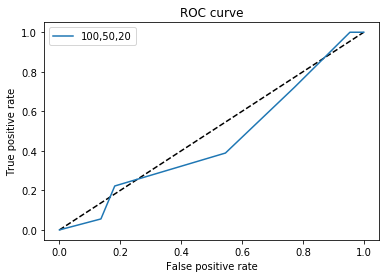

0.449494949495


In [38]:
model.fit(X_train, y_train,nb_epoch=20, batch_size=1)
pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='100,50,20')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print auc

## Using all of Kaggle data to train and test

In [24]:
X = k_df.drop(['target','artist','song_title'],axis=1).values
y = k_df['target'].values
X_normalized = preprocessing.normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)


In [34]:
# Define Model Parameters
nb_feat   = 13    # no. of features/columns of input
L1_units  = 20   # no. of nodes in Layer 1
L2_units  = 10    # no. of nodes in Layer 2
#L3_units  = 20    # no. of nodes in Layer 3
nb_class  = 1     # no. of output classes

# Neural Network Model
model = Sequential()                             # Sequential network model description
model.add(Dense(L1_units,input_shape=(13,),\
                name='L1',\
                activation='sigmoid'))                       # Add 1st Dense Layer

model.add(Dense(L2_units,\
                name='L2',\
                activation='sigmoid'))                       # Add 2nd Dense Layer

#model.add(Dense(L3_units,\
#                name='L3',\
#                activation='sigmoid'))                       # Add 3nd Dense Layer
#
model.add(Dense(units=nb_class,\
                name='Classifier',\
                activation='sigmoid'))                       # Add 4rd Dense Layer, also the classification layer

model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy', recall, precision])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 20)                280       
_________________________________________________________________
L2 (Dense)                   (None, 10)                210       
_________________________________________________________________
Classifier (Dense)           (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1613/1613 [==============================] - 2s - loss: 0.6964 - acc: 0.4966 - recall: 0.2033 - precision: 0.2033     
Epoch 2/10
1613/1613 [==============================] - 2s - loss: 0.6966 - acc: 0.4836 - recall: 0.2418 - precision: 0.2418     
Epoch 3/10
1613/1613 [==============================] - 2s - loss: 0.6961 - acc: 0.4972 - recall: 0.2294 - precision: 0.2294     
Epoch 4/10
1613/1613 [==============================] - 2s - loss: 0.6953 - acc: 0.5022 - recall: 0.2573 - precision: 0.2573     
Epoch 5/10
1613/1613 [==============================] - 2s - loss: 0.6965 - acc: 0.4774 - recall: 0.2331 - precision: 0.2331     
Epoch 6/10
1613/1613 [==============================] - 2s - loss: 0.6954 - acc: 0.5022 - recall: 0.2474 - precision: 0.2474     
Epoch 7/10
1613/1613 [==============================] - 3s - loss: 0.6965 - acc: 0.4786 - recall: 0.2461 - precision: 0.2461     
Epoch 8/10
1613/1613 [==============================] - 2s - loss: 0.6956 - acc: 0.4997 - 

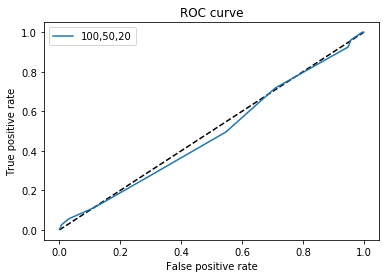

0.484792649371


In [35]:
model.fit(X_train, y_train,nb_epoch=10, batch_size=1)
pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='100,50,20')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print auc